### What can I understand about the history of Scottsdale by looking at the structure of business names registed to do business in Scottsdale over time?

#### The [dataset](http://data.scottsdaleaz.gov/dataset/business-licenses) doesn't include the date that the business first filed for a business license.  Business licenses must be renewed ever few years.  The "Issue Date" within the dataset represents the most recent renewal date.  By spot checking a handful of businesses at the beginning and end of the "License Number" sequence and reviewing the business website and other information available, I'm quite certain License Numbers are issued sequentially.

#### My process involved: 1) tokenize the business name, 2) sort business license dataset by license number, 3) bin the data into 5 bins and filter by the bins, 4) graph bins agains each other(for the time being, just bin 1 and bin 5)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import nltk

#nltk.download('punkt') - only need to do this once

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

business_licenses = pd.read_csv('BusinessLicenses_cleaned.txt', sep='|', engine='python')

# tokenize words in the 'BusinessName' column
business_licenses['Tokenize_Text'] = business_licenses['BusinessName'].apply(nltk.word_tokenize)

# sort business names ascending
business_licenses.sort_values(['LicenseNumber'], ascending=True, inplace=True)

In [3]:
business_licenses.reset_index(inplace=True)
business_licenses.head()

,index,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry,Tokenize_Text
0,21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[A-ACCENT, PLUMBING, INC]"
1,10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ASSOCIATED, FINISHES, INC]"
2,11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,"[BARRY, 'S, DANCE, THEATRE, SHOP]"
3,2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA,"[BASHAS, 16]"
4,23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[BOOTZ, AND, DUKE, SIGN, COMPANY]"


In [4]:
# segment all business licenses into 5 buckets
business_licenses['Bucket'] = pd.cut(business_licenses.index, 5, labels=['1','2','3','4','5'])

In [5]:
#verify bins are distributed equally
business_licenses.groupby('Bucket')['Bucket'].count()

Bucket
1    5151
2    5151
3    5151
4    5151
5    5151
Name: Bucket, dtype: int64

### Bucket 1

In [6]:
# form bucket of businesses from earliest period of Scottsdale history
stopwords = ['THE',
            'OF',
            'AND',
            "'S"]

bucket_1_words = []

for row in business_licenses[business_licenses['Bucket'] == '1'].loc[:,'Tokenize_Text']:
    for business_name_token in row:
        if len(business_name_token) > 1 and business_name_token not in stopwords:
            bucket_1_words.append(business_name_token)

bucket_1_words_df = pd.DataFrame(bucket_1_words, columns=['tokens'])

bucket_1_word_count = bucket_1_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

bucket_1_word_count.head()

,tokens,token_count
2706,INC,1199
3187,LLC,581
4562,SCOTTSDALE,142
1347,COMPANY,135
1288,CO,132


In [7]:
# take the log of token count in order to prevent the data from being as skewed toward largest number of tokens
bucket_1_word_count['log'] = np.log(bucket_1_word_count.iloc[:,1])

# create row tag for graphing purposes
bucket_1_word_count['Bucket'] = 'Oldest 20%'

bucket_1_word_count.head()

,tokens,token_count,log,Bucket
2706,INC,1199,7.089243,Oldest 20%
3187,LLC,581,6.364751,Oldest 20%
4562,SCOTTSDALE,142,4.955827,Oldest 20%
1347,COMPANY,135,4.905275,Oldest 20%
1288,CO,132,4.882802,Oldest 20%


### Bucket 5

In [8]:
# form bucket of businesses from earliest period of Scottsdale history
stopwords = ['THE',
            'OF',
            'AND',
            "'S"]

bucket_5_words = []

for row in business_licenses[business_licenses['Bucket'] == '5'].loc[:,'Tokenize_Text']:
    for business_name_token in row:
        if len(business_name_token) > 1 and business_name_token not in stopwords:
            bucket_5_words.append(business_name_token)

bucket_5_words_df = pd.DataFrame(bucket_5_words, columns=['tokens'])

bucket_5_word_count = bucket_5_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

bucket_5_word_count.head()

,tokens,token_count
3328,LLC,1300
2793,INC,530
4921,SCOTTSDALE,166
4976,SERVICES,91
1341,CONSTRUCTION,87


In [9]:
# take the log of token count in order to prevent the data from being as skewed toward largest number of tokens
bucket_5_word_count['log'] = np.log(bucket_5_word_count.iloc[:,1])

# create row tag for graphing purposes
bucket_5_word_count['Bucket'] = 'Newest 20%'

bucket_5_word_count.head()

,tokens,token_count,log,Bucket
3328,LLC,1300,7.170120,Newest 20%
2793,INC,530,6.272877,Newest 20%
4921,SCOTTSDALE,166,5.111988,Newest 20%
4976,SERVICES,91,4.510860,Newest 20%
1341,CONSTRUCTION,87,4.465908,Newest 20%


### Join buckets together

In [10]:
# join buckets together with outer join, providing NaN values for tokens not in the other bucket 
words_joined = pd.merge(bucket_5_word_count, bucket_1_word_count, how='outer', on='tokens')

# rename columns to be more descriptive
words_joined.rename(columns={'token_count_x': 'Newest 20%', 'token_count_y': 'Oldest 20%'}, inplace=True)

# filter only for tokens not in the other bucket
words_not_in_other = words_joined[words_joined['Newest 20%'].isnull() | words_joined['Oldest 20%'].isnull()]

words_not_in_other.head()

,tokens,Newest 20%,log_x,Bucket_x,Oldest 20%,log_y,Bucket_y
80,FLEEK,18.0,2.890372,Newest 20%,NaN,NaN,NaN
91,AESTHETICS,16.0,2.772589,Newest 20%,NaN,NaN,NaN
116,WL,14.0,2.639057,Newest 20%,NaN,NaN,NaN
153,LASH,11.0,2.397895,Newest 20%,NaN,NaN,NaN
168,HEALING,10.0,2.302585,Newest 20%,NaN,NaN,NaN


## Newest 20% words that don't show up at all in the oldest 20% bucket.

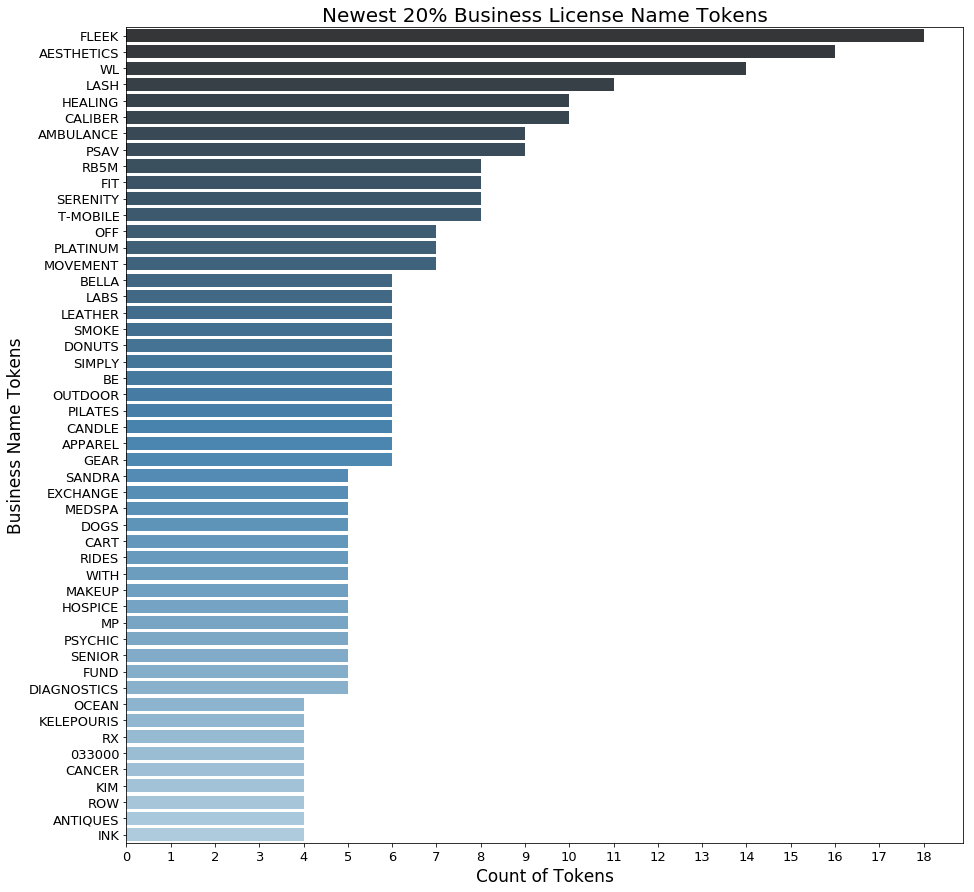

In [21]:
plt.subplots(figsize=(15,15))

ax = sns.barplot(x=words_not_in_other.sort_values(by='Newest 20%', ascending=False).head(50).loc[:,'Newest 20%'], \
             y=words_not_in_other.sort_values(by='Newest 20%', ascending=False).head(50).iloc[:,0], \
            data=words_not_in_other, palette=("Blues_d"))

plt.title('Newest 20% Business License Name Tokens',fontsize=20)
plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

## Oldest 20% words that don't show up at all in the newest 20% bucket.

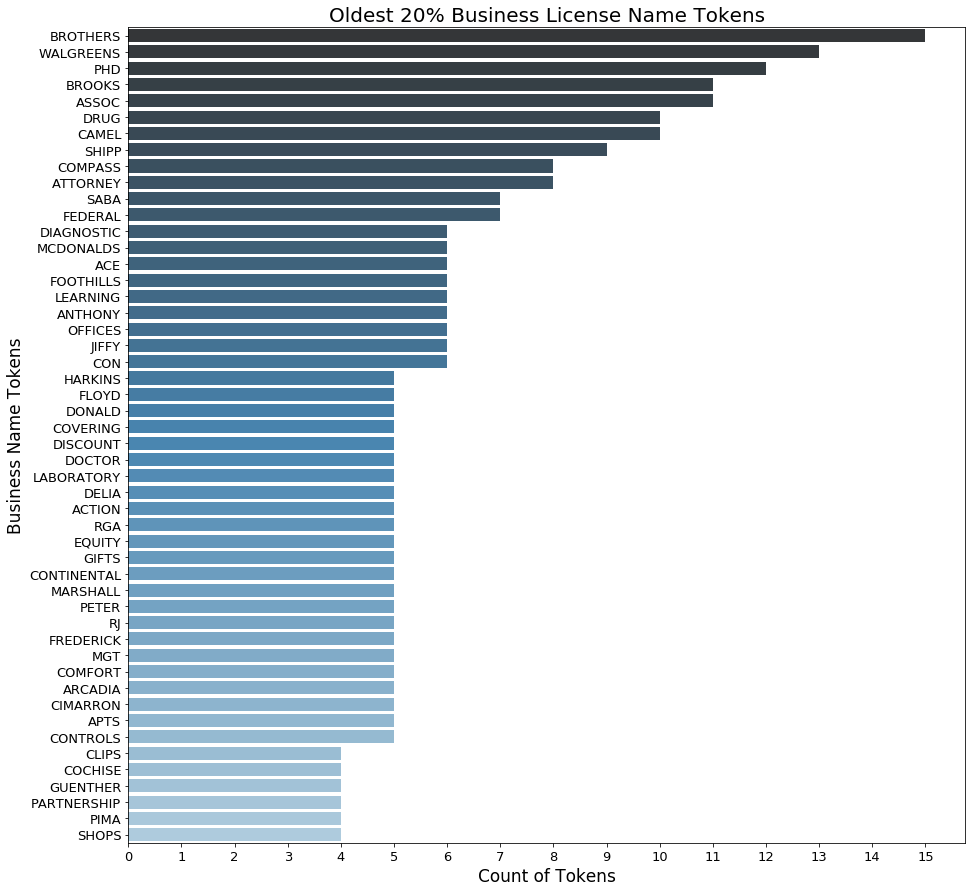

In [20]:
plt.subplots(figsize=(15,15))

ax = sns.barplot(x=words_not_in_other.sort_values(by='Oldest 20%', ascending=False).head(50).loc[:,'Oldest 20%'], \
             y=words_not_in_other.sort_values(by='Oldest 20%', ascending=False).head(50).iloc[:,0], \
            data=words_not_in_other, palette=("Blues_d"))

plt.title('Oldest 20% Business License Name Tokens',fontsize=20)
plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

In [13]:
word_counts_combined = bucket_5_word_count.sort_values(by='token_count', ascending=False).head(100) \
    .append(bucket_1_word_count.sort_values(by='token_count', ascending=False).head(100))

word_counts_combined.head()

,tokens,token_count,log,Bucket
3328,LLC,1300,7.170120,Newest 20%
2793,INC,530,6.272877,Newest 20%
4921,SCOTTSDALE,166,5.111988,Newest 20%
4976,SERVICES,91,4.510860,Newest 20%
1341,CONSTRUCTION,87,4.465908,Newest 20%


## Comparison of top 100 words from each bucket graphed against each other

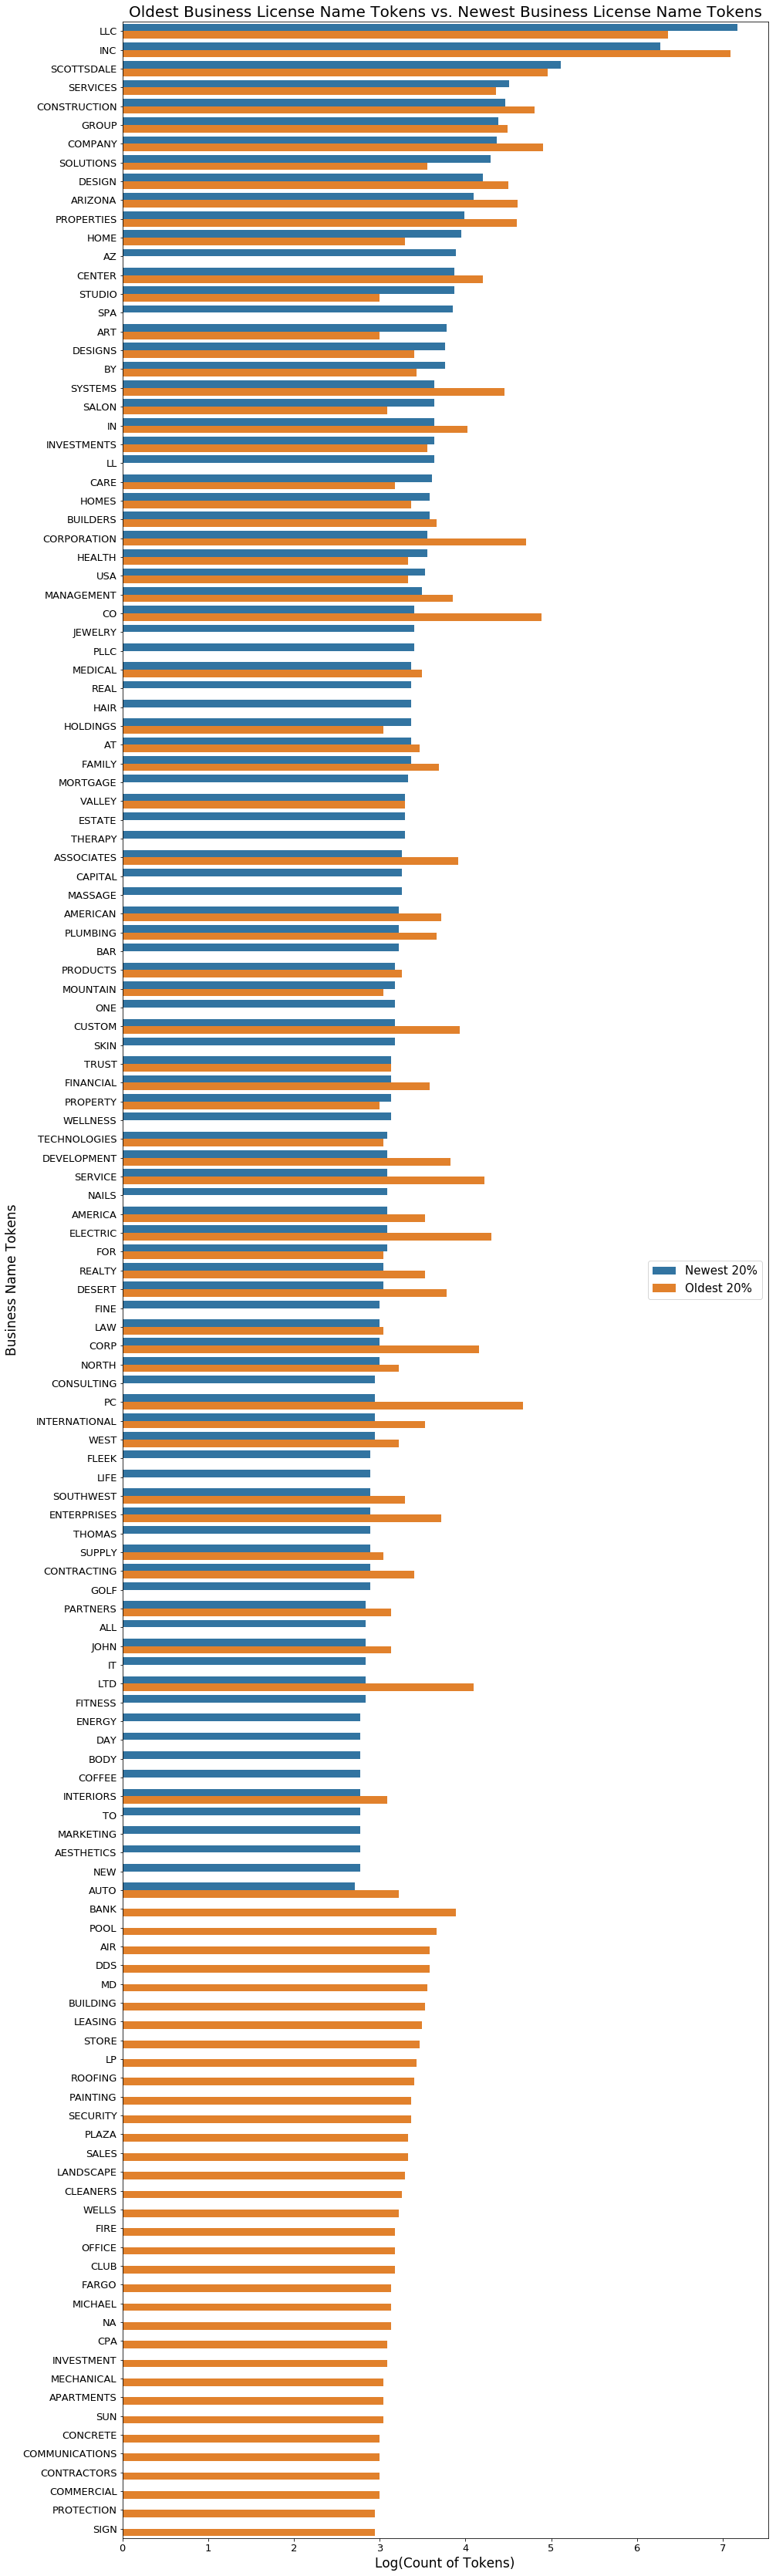

In [14]:
plt.subplots(figsize=(15,60))

sns.barplot(x=word_counts_combined.loc[:,'log'], \
             y=word_counts_combined.loc[:,'tokens'], \
             hue=word_counts_combined.loc[:,'Bucket'], \
             data=word_counts_combined)

plt.title('Oldest Business License Name Tokens vs. Newest Business License Name Tokens',fontsize=20)
plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Log(Count of Tokens)',fontsize=17)
plt.tick_params(labelsize=13)
plt.legend(loc='center right',fontsize=15)
plt.savefig('visualizations/Oldest Business License Name Tokens vs. Newest Business License Name Tokens(log).png')

## Results: 

### Largely as I would expect, with the largest difference by far being the prevelance of LLCs today, while Inc was much more common on the past.  
### Recent businesses are much more concered with helping people take care of themselves.  Business name tokens such as "spa", "therapy", "nails", "massage" are not represented at all in the older business names.  However, this could be that these sorts of businesses don't have the longevity that other businesses have.  
### Older businesses include name tokens not represented in newer business names include "bank", "pool", "air", "painting" - businesses that seem to lend themselves to construction/maintenance services.
### Below - graph of count(rather than log) of business name tokens, the skew effect of LLC and Inc tokens is much more prevelant.

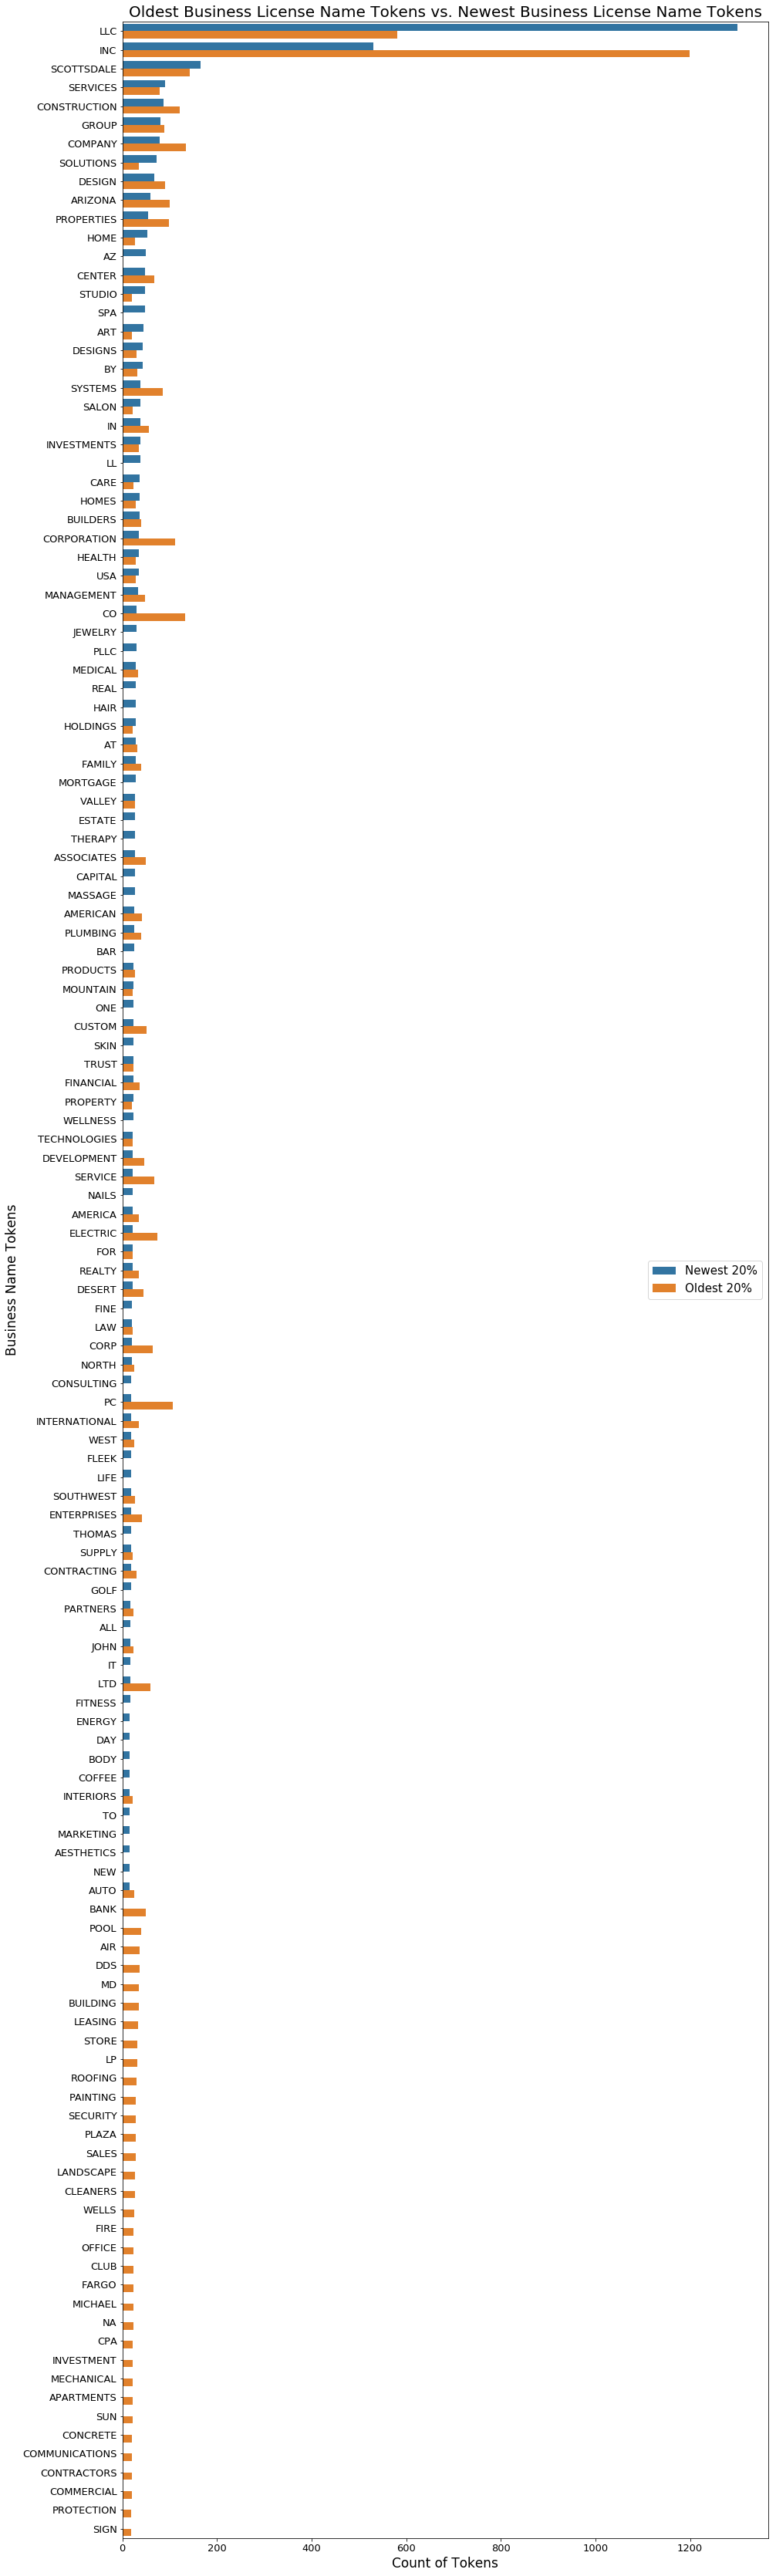

In [22]:
plt.subplots(figsize=(15,60))

sns.barplot(x=word_counts_combined.loc[:,'token_count'], \
             y=word_counts_combined.loc[:,'tokens'], \
             hue=word_counts_combined.loc[:,'Bucket'], \
             data=word_counts_combined)

plt.title('Oldest Business License Name Tokens vs. Newest Business License Name Tokens',fontsize=20)
plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)
plt.legend(loc='best',fontsize=15)
plt.savefig('visualizations/Oldest Business License Name Tokens vs. Newest Business License Name Tokens(count).png')